# 1. Import Library

In [14]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [15]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [16]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [17]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [18]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [20]:
x_Train4D_normalize.shape

(60000, 28, 28, 1)

# 建立模型

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [2]:
model = Sequential()

In [3]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [4]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [6]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(128, activation='relu'))

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(10,activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [19]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 111s - loss: 0.4964 - accuracy: 0.8452 - val_loss: 0.1007 - val_accuracy: 0.9677
Epoch 2/20
160/160 - 118s - loss: 0.1362 - accuracy: 0.9592 - val_loss: 0.0659 - val_accuracy: 0.9790
Epoch 3/20
160/160 - 130s - loss: 0.1002 - accuracy: 0.9700 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 4/20
160/160 - 112s - loss: 0.0797 - accuracy: 0.9764 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 5/20
160/160 - 108s - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0390 - val_accuracy: 0.9891
Epoch 6/20
160/160 - 109s - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 7/20
160/160 - 126s - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 8/20
160/160 - 109s - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 9/20
160/160 - 104s - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0359 - val_accuracy: 0.9898
Epoch 10/20
160/160 - 116s - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0332 - 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

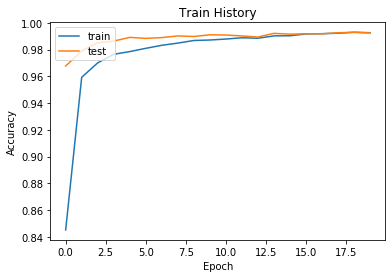

In [21]:
show_train_history('accuracy','val_accuracy')

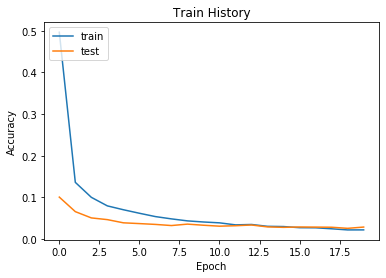

In [22]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 15s 47ms/step - loss: 0.0216 - accuracy: 0.9932


0.9932000041007996

# 預測結果

In [24]:
prediction=model.predict_classes(x_Test4D_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

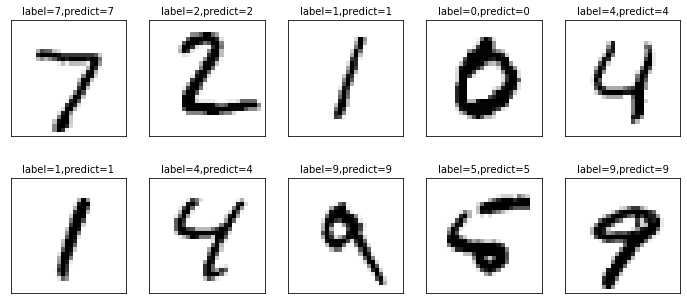

In [27]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [28]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1131,1,1,0,0,1,0,1,0
2,1,0,1028,0,0,0,0,1,2,0
3,0,0,0,1005,0,1,0,1,3,0
4,0,0,0,0,978,0,0,0,1,3
5,1,0,0,4,0,885,1,1,0,0
6,3,2,0,0,2,1,949,0,1,0
7,0,1,3,1,0,0,0,1020,1,2
8,1,0,2,2,0,1,0,1,965,2


In [29]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [30]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
2597,5,3
5937,5,3
